<a href="https://colab.research.google.com/github/edwin254/30-days-of-react/blob/master/Copy_of_Practice_Notebook_Regression_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Notebook: Regression Analysis with Python

## 1. Simple Linear Regression

#### <font color="blue">Pre-requisites</font>

In [0]:
# The first thing that we will do is to import the required datasets
# ---
# OUR CODE GOES BELOW
#  

# Importing pandas for data manipulation
# 
import pandas as pd 

# Importing numpy for mathematical functions
import numpy as np

# Importing matplotlib for creating visualisations
# 
import matplotlib.pyplot as plt
%matplotlib inline

#### <font color="blue">Example 1</font>

##### <font color="blue">Example</font>

In [0]:
# Example
# --- 
# Question: Create a linear regression model to predict the output y given the input x from the dataset below.
# ---
# Dataset url = http://bit.ly/SimpleLinearRegresionDataset
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Data 

In [0]:
# The first step that we will take is to import our dataset and store it in our dataframe named df
# --- 
# 
df = pd.read_csv('http://bit.ly/SimpleLinearRegresionDataset')

##### Step 2. Checking the Data 

In [0]:
# We will then determine the size of our dataset using the keyword shape
# ---
# 
df.shape

(700, 2)

In [0]:
# The preview our dataset using the head function()
# ---
#
df.tail()

NameError: ignored

In [0]:
# We can also display the statistical summary of our dataset. 
# ---
# 
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


##### Step 3. Cleaning Our Data

In [0]:
# Lets confirm for missing values in our dataset. 
# We can already see from our summary that the count 
# of the y variable is not equal to x
# ---
#
df.isnull().sum()

# Observation 
# ---
# One record has a missing

x    0
y    1
dtype: int64

In [0]:
# We can then resolve to propping all records with N/A from our dataset
# This would be for the reason that there won't be any significant effect in analysis.
# ---
#
df = df.dropna() 

In [0]:
# Lets check again for missing values in our dataset
# ---
#
df.isnull().sum()

x    0
y    0
dtype: int64

##### Step 4. Performing Exploratory Analysis

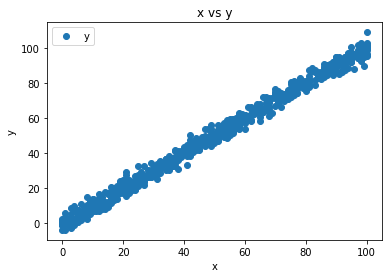

In [0]:
# We the perform exploratory analysis to understand more about our dataset
# ---
# In our case here, we will only find if there is any relationships between the two variables.
# ---
# 
df.plot(x='x', y='y', style='o')
plt.title('x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Observation
# ---
# Positive linear relation

##### Step 5. Implementation and Evaluation

In [0]:
# Data Preparation
# ---
# We now divide our data into "attributes" and "labels".
# a) Attributes are the independent variables. 
# They will be stored in the X variable, specifying "-1" as the range for columns 
# since we want our attribute set to contain all the columns 
# except the last one which is "scores".
# 
# b) Labels are the dependent variables. 
# They will be contained in the y variable, specifying 1 for the label colum 
# since the index for "scores" column is 1.
# 
# * NB: Column indexes start with 0, 1 being the second, 2 being third etc.
# - Because We are predicting the percentage score depending on hours studied, 
# our attribute set will consist of "hours", while the lable will be "score"
# 
# * As we will get to see in another example, we can also specify the column names to 
# select our attributes and label 
# ---
# 
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [0]:
# Splitting the Dataset 
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# This means we will specify our parameter test_size below to have the value 0.2.
# ---
#

# Before we preform the split, we will import the train_test_split function
# which will help us perform this operation.
# ---
#
from sklearn.model_selection import train_test_split

# We then perform our split as show in the following line
# ---
# The test size of 0.2 indicates we’ve used 20% of the data for testing. 
# random_state ensures reproducibility. For the output of train_test_split, 
# we get X_train, X_test, y_train, and y_test values.
# ---
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Training the Algorithm
# ---
# We are now ready to create our algorithm. This process is also referred to as 
# fitting in our model / fitting the regressor to the dataset.
# ---
#

# First, we import our linear regression function
# ---
#
from sklearn.linear_model import LinearRegression

# Then train the algorithm
# ---
#
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making Predictions
# ---
# After training our algorithm, we can now make some preditions
# ---   
# 

# We create the y_pred variable, which will be an array (numpy array) 
# that contains all the predicted values for the input values in the X_test series
# ---
#
y_pred = regressor.predict(X_test)

In [0]:
# Next, we compare actual output values for X_test with the predicted values
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

# We will note from the output that though our model is not very precise, 
# the predicted percentages are sometimes close to the actual ones.

,Actual,Predicted
0,29.667360,28.979528
1,56.687188,57.930708
2,85.027790,83.886939
3,73.138500,75.900406
4,48.437538,53.937442
...,...,...
135,14.002263,16.001413
136,94.151492,96.865054
137,40.831821,42.955960
138,19.471008,18.996362


In [0]:
# Finally, we evaluate our model performance
# --- 
# The final step is to evaluate the performance of algorithm. 
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Observation
# ---
# Our root mean square 2.74 is less than 10% the mean of y which was 49. 
# This would mean our model was fairly accurate.
# ---

Root Mean Squared Error: 2.7479975801256606


#### <font color="green">Challenge 1</font>

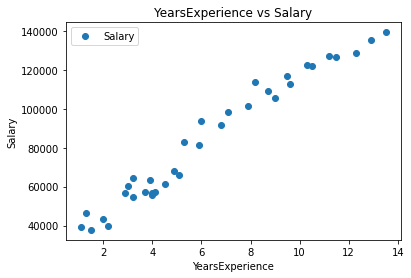

Root Mean Squared Error: 4069.605782010654


In [0]:
# Challenge 
# ---
# Create a regression model that predicts salary based on years of experience.
# ---
# Dataset url = http://bit.ly/SLRSalaryDataset
# ---
# OUR CODE GOES BELOW
#
import pandas as pd 
# Importing numpy for mathematical functions
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Importing matplotlib for creating visualisations
import matplotlib.pyplot as plt
%matplotlib inline

salary_df = pd.read_csv("http://bit.ly/SLRSalaryDataset")
#check null values
salary_df.isnull().sum()
salary_df.tail()

salary_df.plot(x='YearsExperience', y='Salary', style='o')
plt.title('YearsExperience vs Salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

x = salary_df.iloc[:, :1].values
y = salary_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## 2. Multiple Linear Regression

#### <font color="blue">Example 2</font>

##### <font color="blue">Example</font>

In [0]:
# Example
# --- 
# Question: Create a multiple linear regression model to predict 
# the weight of fish given the following dataset.
# ---
# Dataset url = http://bit.ly/MRFishDataset
# ---
# OUR CODE GOES BELOW
#

##### Step 1. Loading our Data 

In [0]:
# Loading our dataset
#
fish_df = pd.read_csv('http://bit.ly/MRFishDataset')

##### Step 2. Checking the Data 

In [0]:
# Previewing the dataset
# 
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Previewing the statistical summary of our dataset
# 
fish_df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 3. Cleaning Our Data

So far from what we've observed from in dataset, we don't need to perform any cleaning.

##### Step 4. Performing Exploratory Analysis

In [0]:
## Performing Exploratory Analysis
# ---
# This time we will plot a correlation matrix, to determine the relationships between the different variables.
# This matrix will give us a sense of how well the variables are correlated. By this we mean, whether an
# increase or decrease in variable affects the other variable. 
# To break this down further, the matrix will provide us with values between -1 and 1. If the value between
# two variables is closer to 1 i.e. > 0.5, then it means the variables are strongly correlated, have a positive linear 
# relationship and it also means that as one value increases the other increases.
# On the other hand, of the value is less than -0.5, it would mean that the variables are strongly correlated but 
# have a negative linear relationship. 
# If the value is 0 or < -0.5 or < 0.5 it means that the variables don't have any relationship with each other.
# ---
# Understanding whether our label i.e. Weight has a high correlation with other variables, helps us to deal 
# with the concept of Multicollinearity which would weaken the statistical power of your regression model. 
# For now, Multicollinearity is a topic beyond the scope of our session. However, it is usually important to 
# note that having highly correlated variables within our dataset weakens our model.
# ---
#
corrMatrix = fish_df.corr()
corrMatrix

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


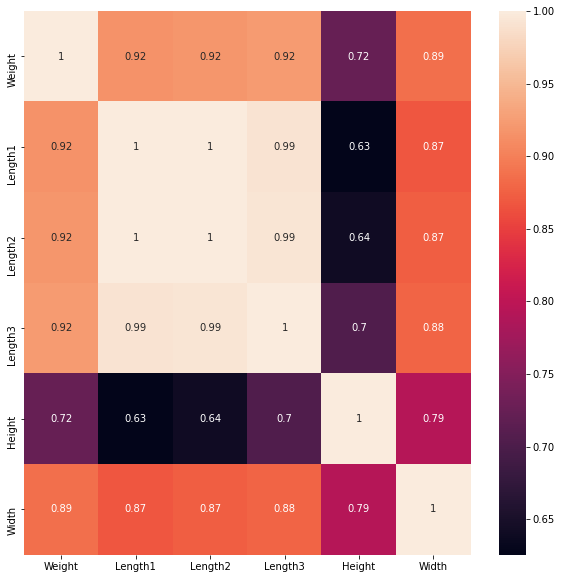

In [0]:
# We can plot a visualisation of the matrix for better clarity
# --- 
# 
import seaborn as sns

# We define how big we want our visualisation
# 
plt.figure(figsize=(10, 10)) 

# Creating our visualisation
# 
sns.heatmap(corrMatrix, annot = True) 

##### Step 5. Implementation and Evaluation

 

In [0]:
# We will now quickly prepare our dataset so that we can fit our model
# ---
# We divide our data into attributes and labels. 
# This time, we use column names for creating an attribute set and label.
# ---
# 
X = fish_df[['Length1', 'Length2', 'Length3',
       'Height', 'Width']]
y = fish_df['Weight']

In [0]:
# We then Split our datset
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# ---
#

# Firstly, importing our train_test_split function
# ---
#
from sklearn.model_selection import train_test_split

# Performing our split
# ---
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Training the Algorithm
# ---
# 

# Firstly, importing our linear regression function
# ---
#
from sklearn.linear_model import LinearRegression

# Training the algorithm
# ---
# 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Making Predictions
# ---
# After training our algorithm, we can now make some preditions
# ---
# We create the y_pred variable, which will contain 
# all the predicted values for the input values in the X_test series
# ---
#
y_pred = regressor.predict(X_test)

In [0]:
# Next, we compare actual output values for X_test with the predicted values
# This should also give us a sense of how our model performed during prediction
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(10)

,Actual,Predicted
60,1000.0,778.895209
24,700.0,661.670786
119,850.0,784.846442
37,78.0,92.007666
8,450.0,515.924385
7,390.0,472.383172
126,1000.0,896.402294
54,390.0,497.849241
144,1650.0,1164.472284
33,975.0,895.022203


In [0]:
# Finally, we evaluate our model performance
# --- 
# The final step is to evaluate the performance of algorithm  
# Root Mean Squared Error (RMSE). This is the square root of the mean of the squared errors.
# ---  
#
from sklearn import metrics 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Observation
# ---
# We can see that the value of root mean squared error is 161.33, 
# which is greater than 10% of the mean value of the weight of 398. 
# This means that our algorithm fairly accurate and can make reasonably good predictions.
# There are many factors that may have contributed to this inaccuracy, a few of which are :
# 1. Need more data: Only one year worth of data isn't that much, 
#    whereas having multiple years worth could have helped us improve the accuracy quite a bit.
# 2. Bad assumptions: We made the assumption that this data has a linear relationship, 
#    but that might not be the case. Visualizing the data may help you determine that. 
# 3. Poor features: The features we used may not have had a high enough correlation 
#    to the values we were trying to predict.

Root Mean Squared Error: 161.33107273485066


#### <font color="green">Challenge 2</font>

**Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

**Business Goal**

We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

Problem Source [Kaggle](https://www.kaggle.com/hellbuoy/car-price-prediction)

In [0]:
# Challenge 
# ---
# Create a model to predict the price of cars given the following dataset.
# ---
# Dataset url = http://bit.ly/CarPriceDataset
# ---
# OUR CODE GOES BELOW
#

## 3. K-Nearest Neighbor (KNN) Regression

#### <font color="blue">Example 3</font>

##### <font color="blue">Example</font>

In [0]:
# Example
# ---
# Question: Using the KNN Algorithm, create a regression model to 
# predict the weight of fish given the following dataset.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# NB: This dataset is clean version of the one 
# we used in the multiple regression example above.
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Data 

In [0]:
# Reading our Dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Previwing our dataset
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset in example 2

##### Step 5. Implementation and Evaluation

In [0]:
# We will now quickly prepare our dataset so that we can fit our model
# ---
# We divide our data into attributes and labels. 
# This time, we use column names for creating an attribute set and label.
# ---
# 
X = df[['Length1', 'Length2', 'Length3',
       'Height', 'Width']]
y = df['Weight']

In [0]:
# We then Split our datset
# ---
# We split our dataset into training and test sets. 80% = training set, while 20% = test set
# ---
#

# Firstly, importing our train_test_split function
# ---
#
from sklearn.model_selection import train_test_split

# Performing our split
# ---
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Performing feature scaling
# ---
#
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

In [0]:
# Applying our algorithm
# ---
# 
# Firstly, importing our KNN regression function
# ---
# 
from sklearn.neighbors import KNeighborsRegressor
  
# We initialize our algorithm with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. 
# There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, we can use 5  as it is the most commonly used value for KNN algorithm.
# ---
#  
regressor = KNeighborsRegressor(5)
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [0]:
# Making predictions using our model
# ---
#  
y_pred = regressor.predict(X_test)

In [0]:
# Next, we compare actual output values for X_test with the predicted values
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(10)

,Actual,Predicted
56,270.0,187.00
63,90.0,69.70
37,78.0,70.70
83,115.0,79.40
19,650.0,515.00
62,60.0,36.68
86,120.0,83.00
144,1650.0,1104.00
26,720.0,639.00
90,110.0,112.40


In [0]:
# Finally, we evaluate the algorithm
# --- 
# The final step is to evaluate the performance of algorithm.
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.
# ---  
#  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 171.02280820112853


#### <font color="green">Challenge 3</font>

##### <font color="green">Challenge</font>

In [0]:
# Challenge 
# ---
# Create a regression model given the following dataset.
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# Hint: For ease of use of this dataset, drop the No. and date columns
# ---
# OUR CODE GOES BELOW
#

## 4. Decision Trees Regression

#### <font color="blue">Example 4</font>

##### <font color="blue">Example</font>

In [0]:
# Example
# --- 
# Questions: Create a decision tree regression model using the following dataset.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# NB: This dataset is clean version of the one 
# we used in the multiple regression example above.
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Data 

In [0]:
# Reading our data
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

In [0]:
# Let's now split our dataset
# ---
# 
# Firstly, importing our train_test_split function
# ---
#
from sklearn.model_selection import train_test_split

X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [0]:
# Lets now train our algorithm
# ---
#  

from sklearn.tree import DecisionTreeRegressor 

# Create the Decision Tree regressor object here.
# We only use the parameter random_state parameter with value 0
# ---
# 
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
# Making predictions using our model
# ---
#  
y_pred = regressor.predict(X_test)

In [0]:
# Next, we compare actual output values for X_test with the predicted values
# ---
#
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.sample(10)

,Actual,Predicted
119,850.0,1015.0
90,110.0,120.0
60,1000.0,955.0
143,1550.0,650.0
148,9.7,8.7
7,390.0,430.0
74,40.0,40.0
27,714.0,725.0
45,160.0,150.0
107,300.0,250.0


In [0]:
# Finally, we evaluating the algorithm
# --- 
# The final step is to evaluate the performance of algorithm  
# ---  
#  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 205.0139116214637


#### <font color="green">Challenge 4</font>

##### <font color="green">Challenge</font>

In [0]:
# Challenge 
# ---
# Using decision trees, create a regression model using the following dataset.
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# ---
# OUR CODE GOES BELOW
# 

## 5. Support Vector Regression

#### <font color="blue">Example 5</font>

##### <font color="blue">Example</font>

In [0]:
# Example
# --- 
# Question: Using the Support Vector Regressor, create a regression model using the clean dataset below.
# ---
# Dataset url = http://bit.ly/FishDatasetClean
# ---
# OUR CODE GOES BELOW
# 

##### Step 1. Loading our Dataset

In [0]:
# Loading our dataset
# ---
# 
df = pd.read_csv('http://bit.ly/FishDatasetClean')
df.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [0]:
# Describing our dataset
# ---
# 
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


##### Step 2, 3, 4: Checking, Cleaning, Exploratory Analysis and have already been performed on our dataset.

##### Step 5. Implementation and Evaluation

In [0]:
# Splitting our dataset
# ---
# We’ll create the X and y variables by taking them from the dataset and
# ---
# 
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

In [0]:
# We split our dataset as shown below
# ---
# The test size of 0.4 indicates we’ve used 40% of the data for testing. 
# Random_state ensures reproducibility.
# ---
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

In [0]:
# Performing feature scaling
# ---
#
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_y.fit_transform(X_test)

In [0]:
# Fitting in our model / Training our Algorithm / Fit the regressor to the scaled dataset
# ---
# We use the kernel type: 'linear'.
# Other kernel types: rbf, polynomial, sigmoid
# 

# We first import our model from sklearn.svm
# ---
# 
from sklearn.svm import SVR

# Then perform our training/fitting
# ---
#
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Making predictions using our model
# ---
#  
y_pred = regressor.predict(X_test)

In [0]:
# Finally, we evaluate our model
# --- 
# The final step is to evaluate the performance of algorithm  
# ---  
#  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 194.1334512042152


#### <font color="green">Challenge 5</font>

##### <font color="green">Challenge</font>

In [0]:
# Challenge 
# ---
# Using SVM, create a regression model to predict price using the given dataset.
# Once you do so, determine which models is better
# ---
# Dataset url = http://bit.ly/RealEstateDataset2
# ---
# OUR CODE GOES BELOW
#